In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [104]:
df = pd.read_csv('tested.csv',usecols=['Age','Fare','Survived'])

In [105]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')   # make sure it's numeric
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')   # make sure it's numeric
df['Fare'] = df['Age'].fillna(df['Fare'].mean())

In [106]:
df.head()

,Survived,Age,Fare
0,0,34.5,34.5
1,1,47.0,47.0
2,0,62.0,62.0
3,0,27.0,27.0
4,1,22.0,22.0


In [107]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
df = pd.DataFrame(scal.fit_transform(df))

# Fist then we do to extract x,y for model.

In [108]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [109]:
# make the x,y train test 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

KeyError: 'Age'

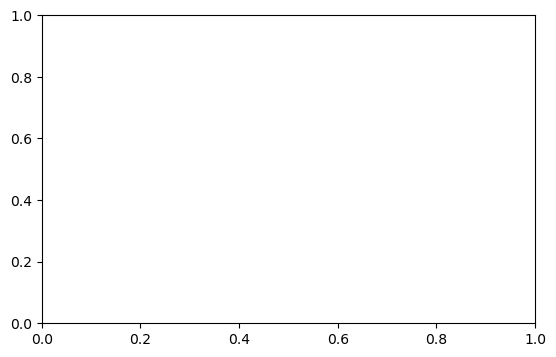

In [110]:
plt.figure(figsize=(14,4))

# Histogram + KDE
plt.subplot(121)
sns.kdeplot(x_train['Age'], fill=False)   # fill=True makes area shaded
plt.title('Age KDE (PDF)')

# QQ plot
plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ plot')

plt.show()

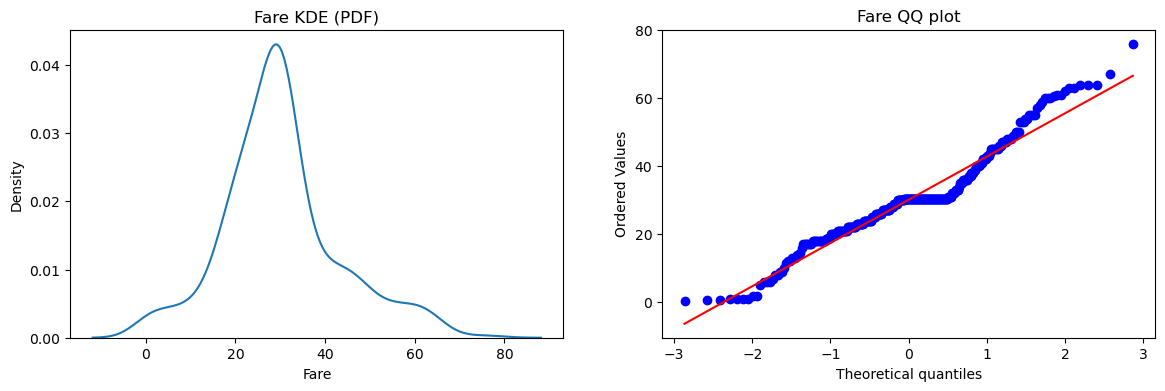

In [ ]:
plt.figure(figsize=(14,4))

# Histogram + KDE
plt.subplot(121)
sns.kdeplot(x_train['Fare'], fill=False)   # fill=True makes area shaded
plt.title('Fare KDE (PDF)')

# QQ plot
plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [ ]:
df.head()

,Survived,Age,Fare
0,0,34.5,34.5
1,1,47.0,47.0
2,0,62.0,62.0
3,0,27.0,27.0
4,1,22.0,22.0


In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accurecy of LR = " , accuracy_score(y_test,y_pred))
print("Accurecy of DT = " , accuracy_score(y_test,y_pred1))

Accurecy of LR =  0.5952380952380952
Accurecy of DT =  0.5952380952380952


In [ ]:
trf = FunctionTransformer(func=np.log1p)

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)


print('accuracy_score ',accuracy_score(y_test,y_pred))
print('accuracy_score ',accuracy_score(y_test,y_pred1))

accuracy_score  0.5952380952380952
accuracy_score  0.5833333333333334
